## Data Wrangling

In [1]:
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

C:\Users\sit_k\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
gender = pd.read_csv('./data/age_gender_bkts.csv')
train = pd.read_csv('./data/train_users_2.csv')
test = pd.read_csv('./data/test_users.csv')
country = pd.read_csv('./data/countries.csv')
session = pd.read_csv('./data/sessions.csv')
age_gender = pd.read_csv('./data/age_gender_bkts.csv')

In [3]:
print(gender.shape)
print(gender.info())
display(gender.tail())

(420, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB
None


,age_bucket,country_destination,gender,population_in_thousands,year
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0
419,80-84,US,male,2442.0,2015.0


In [4]:
gender['age_bucket'].unique()

array(['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74',
       '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39',
       '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4'],
      dtype=object)

In [5]:
print(country.shape)
print(country.info())
display(country)

(10, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_destination            10 non-null     object 
 1   lat_destination                10 non-null     float64
 2   lng_destination                10 non-null     float64
 3   distance_km                    10 non-null     float64
 4   destination_km2                10 non-null     float64
 5   destination_language           10 non-null     object 
 6   language_levenshtein_distance  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 688.0+ bytes
None


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [6]:
print(age_gender.shape)
print(age_gender.info())
display(age_gender)

(420, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB
None


,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
...,...,...,...,...,...
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0


In [7]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [125]:
display(session.shape)

(10567737, 6)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [10]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


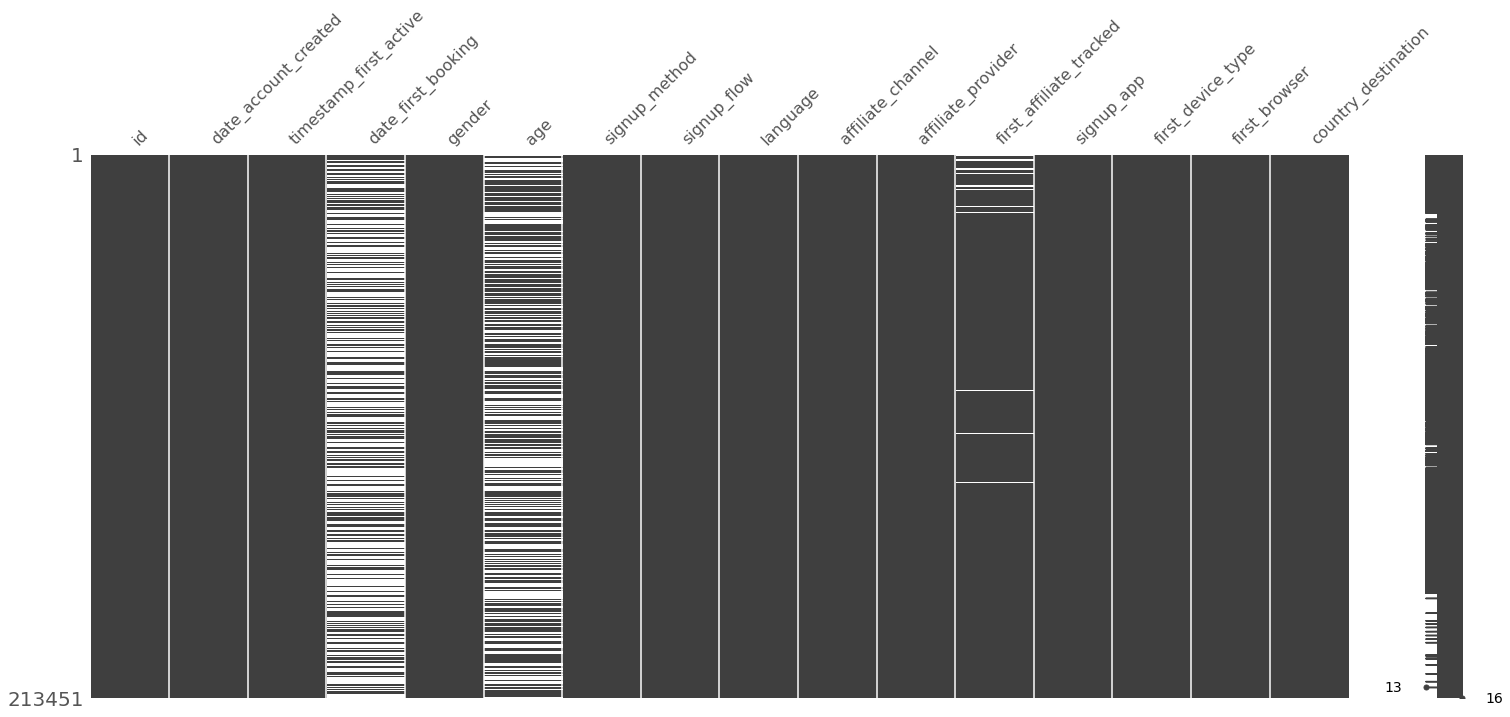

In [11]:
msno.matrix(train);

In [12]:
train['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

### Cleaning steps needed:
- convert all date/time related columns into datetime
- deal with missing age and through assigning new variables and binning
- filling first_affiliate_tracked missing value with new category value "missing"

#### Time

In [13]:
train['date_account_created'] = pd.to_datetime(
    train['date_account_created'], format='%Y-%m-%d', errors='coerce')
train['date_account_created'] = pd.to_datetime(
    train['date_account_created'], format='%Y-%m-%d', errors='coerce')
train['date_first_booking'] = pd.to_datetime(
    train['date_first_booking'], format='%Y-%m-%d', errors='coerce')
train['timestamp_first_active'] = pd.to_datetime(
    train['timestamp_first_active'], format='%Y%m%d%H%M%S', errors='coerce')

#### Age

In [14]:
# for missing value, assign -1 as the age value
train['age_fill'] = train['age'].apply(
    lambda x: -1 if x > 1000 else x).fillna(-1)

In [15]:
train['age_fill'].describe()

count    213451.000000
mean         21.438293
std          21.731754
min          -1.000000
25%          -1.000000
50%          26.000000
75%          35.000000
max         150.000000
Name: age_fill, dtype: float64

#### First Affiliate tracked

In [16]:
train['first_affiliate_tracked'].value_counts(dropna=False)

untracked        109232
linked            46287
omg               43982
tracked-other      6156
NaN                6065
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

The missing count is at 6000 thousands, which is still a relatively big number. Not knowing the reason of the miss, we will create a new category called "miss" treat that as a real category

In [17]:
train['first_affiliate_tracked'].fillna('miss', inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  object        
 5   age                      125461 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  213451 non-null  object        
 12  signup_app      

## Data Exploratory

In this section, we are trying to identify variables within the train dataset, then we will dive in to session dataset to understand browsing pattern.

We first want to create a simple binary variable "book" that take value 1 if booking occur, 0 otherwise.

In [19]:
# replace all missing values to 0 then assign 1 for rows that have booking dates
train['book'] = train['date_first_booking'].fillna(
    0).apply(lambda x: 0 if x == 0 else 1)

### Age Group

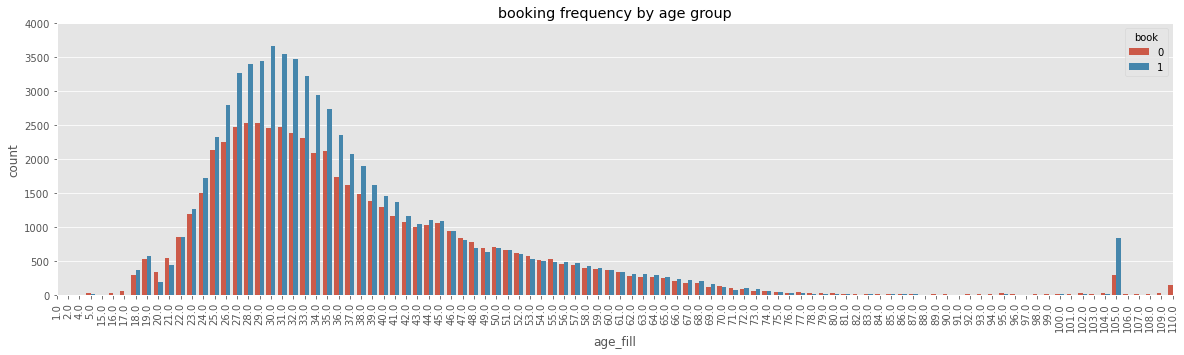

In [20]:
# checking age as function booking frequency
plt.figure(figsize=(20, 5))
ax = sns.countplot(x='age_fill', hue='book', data=train)
plt.title('booking frequency by age group')
plt.xticks(rotation=90)
plt.xlim(1, 100)
plt.ylim(0, 4000)
plt.show()

**Observation**: age group between 25 to 35 appear to have the most booking, and they are also the mainstream user groups. Interesting to see age group 105 has a spike in booking. It is reasonable to believe that the high booking frequency is not driven by age but by other factors. 

We can further apply binning to the age by an interval of 5 as provided by the gender dataset since the distribution of the data is roughly normally distributed

In [21]:
age_cat = age_gender['age_bucket'].unique().tolist()
age_sort = age_cat[::-1]
age_sort.insert(0, 'miss')

In [22]:
train['age_cut'] = pd.cut(
    train['age_fill'], bins=np.arange(-5, 106, 5), labels=age_sort)

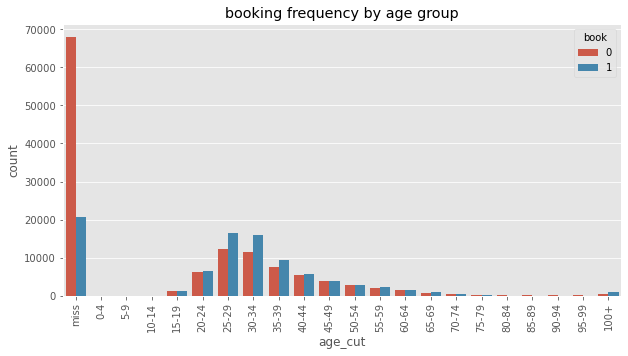

In [23]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='age_cut', hue='book', data=train)
plt.title('booking frequency by age group')
plt.xticks(rotation=90)
plt.show()

Check other features one by one, create function below to streamline the process

In [24]:
def count_plot(x):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=x, hue='book', data=train)
    plt.xticks(rotation=90)
    plt.title('booking frequency based on {}'.format(x))
    plt.tight_layout()
    plt.show()

### Language

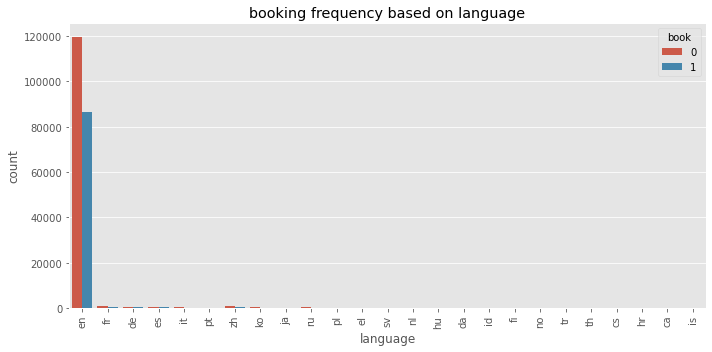

In [25]:
count_plot('language')

English us the main language used on the platform. Given data are imbalance across languages other than English, we will consolidate languages into smaller categories in hope of increase the predictive power of this variable.

In [26]:
lang = {'en': 'eng',
        'zh': 'asia',
        'ko': 'asia',
        'ja': 'asia',
        'fr': 'eu',
        'es': 'eu',
        'de': 'eu',
        'ru': 'eu',
        'pt': 'eu'}

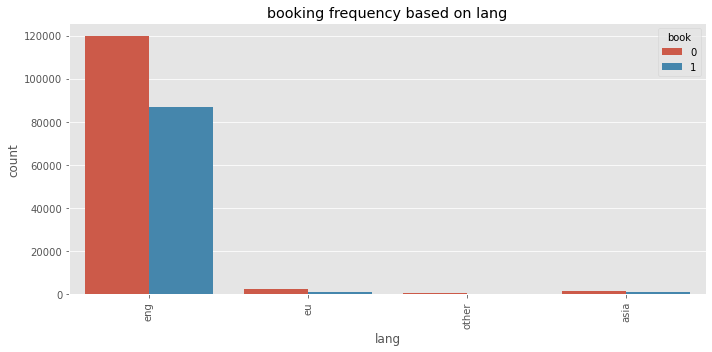

In [27]:
train['lang'] = train['language'].map(lang).fillna('other')
count_plot('lang')

### Browser

In [28]:
train['first_browser'].value_counts()

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
Apple Mail                 36
IE Mobile                  36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
Yandex.Browser             11
CometBird                  11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Opera Mini                  4
Avant Browser               4
Mozilla                     3
OmniWeb   

In [29]:
# consolidate browser type to reduce the number categories
browser = {'Chrome': 'chrome',
           'Chrome Mobile': 'chrome',
           'Safari': 'safari',
           'Mobile Safari': 'safari',
           'Firefox': 'firefox',
           'Mobile Firefox': 'firefox',
           'IE': 'ie',
           'IE Mobile': 'ie',
           '-unknown-': 'unknown'}

In [30]:
train['browser'] = train['first_browser'].map(browser).fillna('other')

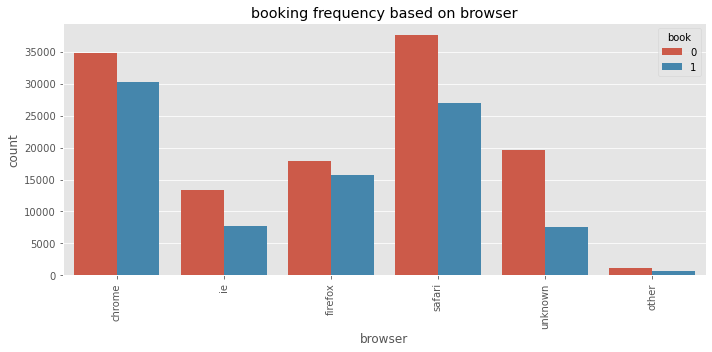

In [31]:
count_plot('browser')

Safari appears to have higher booking rate than chrome. It could be a useful features.

### Signup method and flow

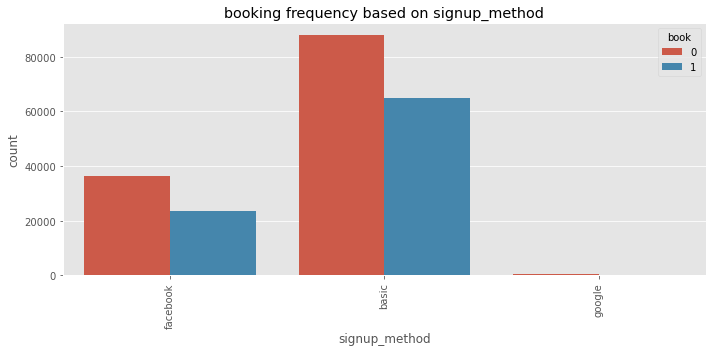

In [32]:
count_plot('signup_method')

The signup method does not seem to vary much on the booking rate. Would not include that in the modeling process

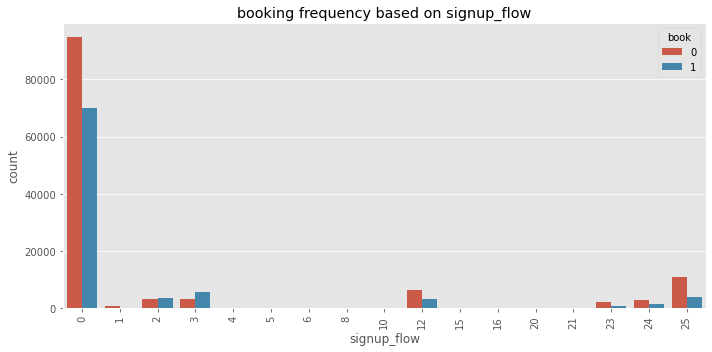

In [33]:
count_plot('signup_flow')

**Observation**: booking rate appear to be the highest when the number of page visit is either 0, 12 or above 23. 0 pages users probably already know what they want and that session just for booking. If they browse more than 20 pages, which could mean that they are really serious above making a booking. It is interesting to see that values from 2-8, then 15-20 sections have very low booking rate, or even no records at all.

### Gender

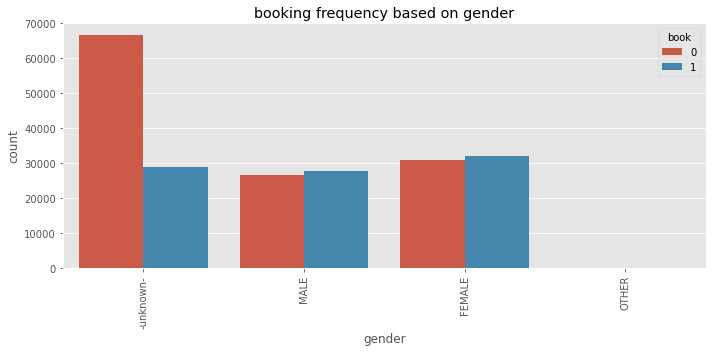

In [34]:
count_plot('gender')

**Observation**: Male and Female booking rate is almost identical. When users didn't specific gender, they are two times more likely to just browsing, which is quite a powerful feature. We will consolidate this features to be a binary variable "gender_stated", 0 is unknown, 1 being otherwise.

In [44]:
train['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [47]:
train['gender_stated'] = train['gender'].apply(
    lambda x: 'no' if x == '-unknown-' else 'yes')

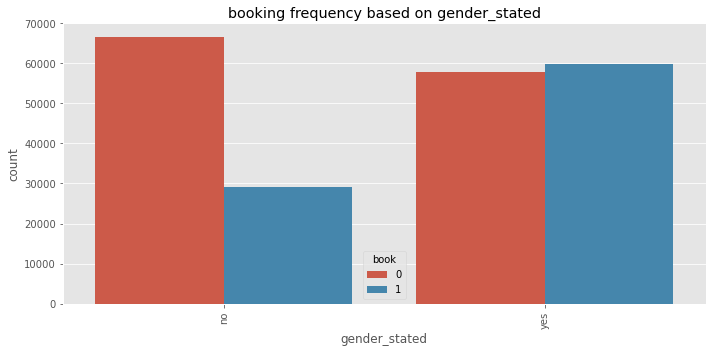

In [48]:
count_plot('gender_stated')

### Affiliate

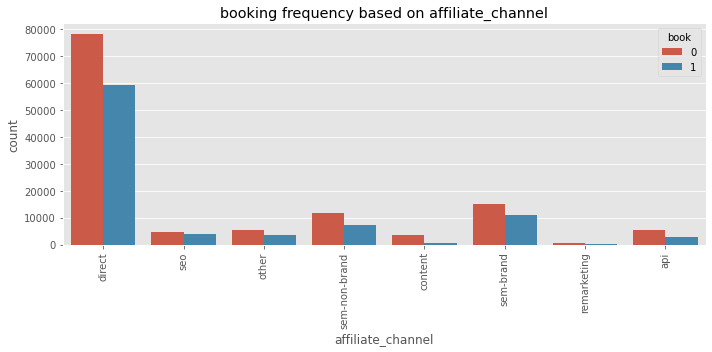

In [50]:
count_plot('affiliate_channel')

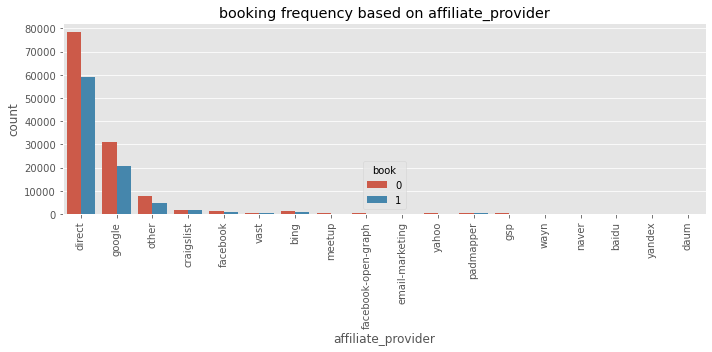

In [51]:
count_plot('affiliate_provider')

**Observation**: From the affiliate standpoint, there are not obvious difference in the booking rate based on the provider or channel.

### Session Data Review

We completed the features for the train dataset, we now move on to the session dataset

In [53]:
# obtain a copy of the browsing session and whether booking happened
id_book = train[['id', 'book']]

In [55]:
session_bk = pd.merge(session, id_book, left_on='user_id', right_on='id', how='inner')

#### Section times

In [68]:
sec_time = session_bk.groupby(['user_id', 'book']).agg({'secs_elapsed': 'sum'}).reset_index()

In [104]:
sec_time['sec_log'] = sec_time['secs_elapsed'].apply(np.log).replace(-np.inf, 0)
# sec_time['sec_log'] = sec_time['sec_log'].replace()

In [105]:
sec_time['sec_log'].describe()

count    73815.000000
mean        13.001341
std          2.643242
min          0.000000
25%         12.456522
50%         13.679533
75%         14.530168
max         17.458905
Name: sec_log, dtype: float64

In [106]:
booked = sec_time.query('book == 1')
dropped = sec_time.query('book == 0')

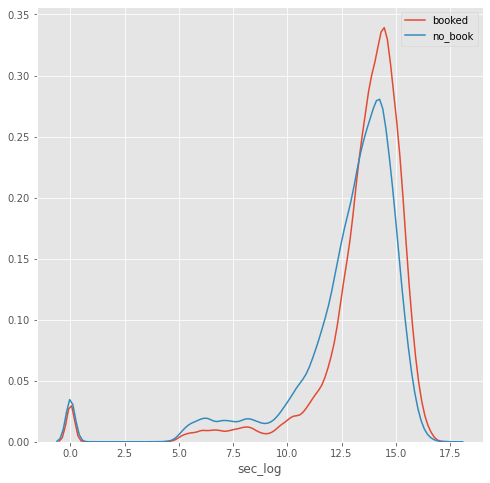

In [112]:
plt.figure(figsize=(8,8))
sns.distplot(booked['sec_log'], label='booked', hist=False)
sns.distplot(dropped['sec_log'], label='no_book', hist=False)
plt.legend(loc='best')
plt.show()

**Observation**: Overall, longer section time will more likely to result in booking. Unfortunately, there isn't a clear cut on the time range since there are enough long sections that do not result in booking, which could represent user browsing during destination research.

In [113]:
session_bk.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed,id,book
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42,1
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42,1
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,d1mm9tcy42,1
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42,1
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,d1mm9tcy42,1


### Last action

We will assume here that the order of the action item within the session dataset is sequential, in which the last row by each user_id is the last action performed by the users before users book or drop from the session. We will create a dataframe to capture that.

In [132]:
last_action = session_bk.groupby(['user_id']).tail(1)

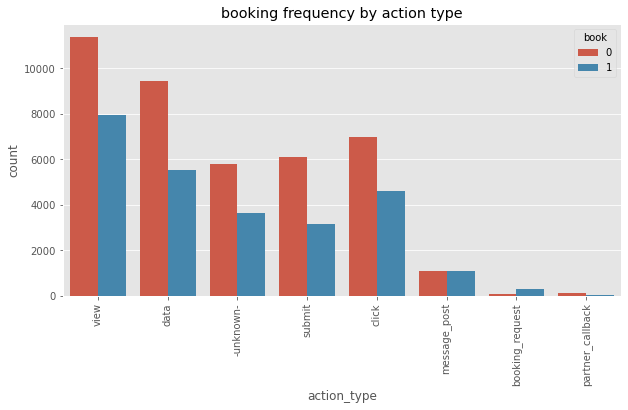

In [145]:
plt.figure(figsize=(10,5))
sns.countplot(x='action_type', hue='book', data=last_action)
plt.title('booking frequency by action type')
plt.xticks(rotation=90)
plt.show()

Each type of the action has different booking rate, we will treat that as an feature.

It turns out there are a lot of categorical among action detail and action, and make it difficult to assess through visualization. We will apply chi-squared test to all variables that cannot be assessed visually.

## Statistical Test

In [146]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
table = pd.crosstab(train['affiliate'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

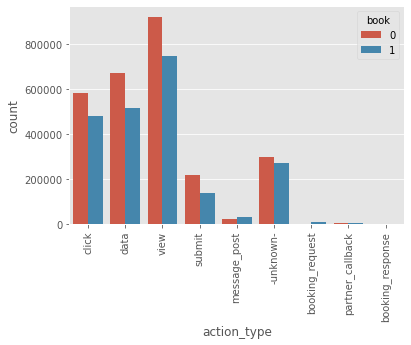

In [118]:
sns.countplot(x='action_type', data=session_bk, hue='book')
plt.xticks(rotation=90)

In [63]:
len(session_bk.action.unique())

332

In [64]:
len(session_bk.action_detail.unique())

129

In [65]:
session_bk.action_type.unique()

array([nan, 'click', 'data', 'view', 'submit', 'message_post',
       '-unknown-', 'booking_request', 'partner_callback',
       'booking_response'], dtype=object)

In [14]:
# check to ensure that all missing first book are under NDF
train[train['first_book'].isna()]['country_destination'].value_counts()

NDF    124543
Name: country_destination, dtype: int64

In [15]:
# assign zero for all missing values under first_book
train['first_book'] = train['first_book'].fillna(train['first_active'])

In [16]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,first_active,account_created,first_book
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19,2010-06-28,2009-03-19
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23,2011-05-25,2009-05-23
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09,2010-09-28,2010-08-02
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31,2011-12-05,2012-09-08
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08,2010-09-14,2010-02-18


In [17]:
# consolidate browser type to reduce the number categories
browser = {'Chrome': 'chrome',
           'Chrome Mobile': 'chrome',
           'Safari': 'safari',
           'Mobile Safari': 'safari',
           'Firefox': 'firefox',
           'Mobile Firefox': 'firefox',
           'IE': 'ie',
           'IE Mobile': 'ie',
           '-unknown-': 'unknown'}

In [18]:
train['browser'] = train['first_browser'].map(browser).fillna('other')

In [19]:
train['browser'].value_counts()

chrome     65115
safari     64443
firefox    33685
unknown    27266
ie         21104
other       1838
Name: browser, dtype: int64

In [20]:
browser_plot = train.groupby(['browser', 'country_destination']).size(
).reset_index().pivot(columns='country_destination', index='browser', values=0)
stack_brower = browser_plot.fillna(0).apply(lambda x: x*100/sum(x), axis=1)
display(stack_brower)

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
browser,,,,,,,,,,,,
chrome,0.239576,0.754051,0.562082,1.167166,2.378868,1.153344,1.392920,53.489979,0.408508,0.112109,32.811180,5.530216
firefox,0.279056,0.863886,0.599673,1.175597,2.722280,1.157785,1.442779,53.264064,0.353273,0.136559,32.702984,5.302063
ie,0.255876,0.568613,0.450152,0.995072,2.174943,1.023503,1.317286,63.371873,0.293783,0.071077,24.924185,4.553639
other,0.108814,0.598477,0.272035,0.489663,1.468988,0.435256,0.816104,65.723613,0.163221,0.000000,25.136017,4.787813
safari,0.301041,0.647083,0.491908,1.111059,2.658163,1.239855,1.488137,58.254582,0.397250,0.102416,28.932545,4.375960
unknown,0.143035,0.359422,0.278735,0.579476,1.312991,0.586811,0.696839,72.060442,0.205384,0.062349,20.641091,3.073425


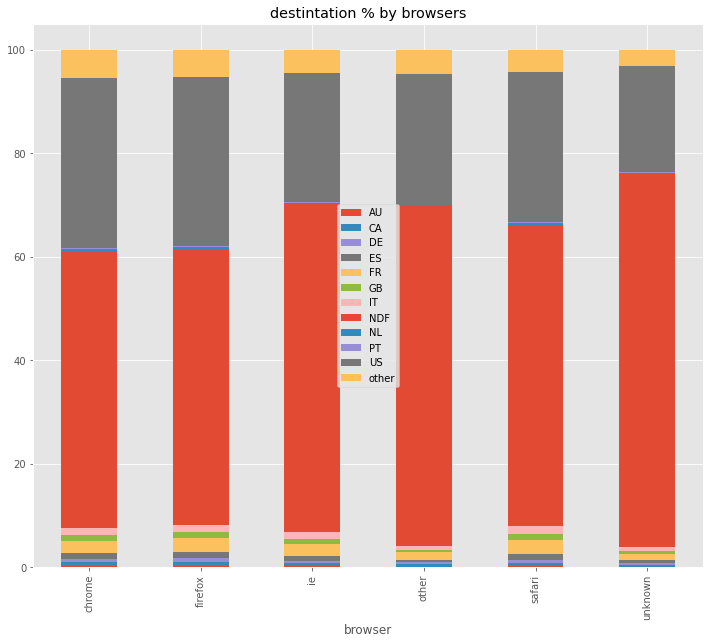

In [21]:
stack_brower.plot(kind='bar', stacked=True, figsize=(12, 10))
plt.title('destintation % by browsers')
plt.legend(loc='center');

Users who use chrome or firefox appear to book a trip more linkely for US

Consolidate language by grouping into four group: eng, asia, eu, and the rest other.

In [25]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,first_active,account_created,first_book,browser,lang
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,...,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19,2010-06-28,2009-03-19,chrome,eng
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,...,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23,2011-05-25,2009-05-23,chrome,eng
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,untracked,Web,Windows Desktop,IE,US,2009-06-09,2010-09-28,2010-08-02,ie,eng
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,untracked,Web,Mac Desktop,Firefox,other,2009-10-31,2011-12-05,2012-09-08,firefox,eng
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,untracked,Web,Mac Desktop,Chrome,US,2009-12-08,2010-09-14,2010-02-18,chrome,eng


In [26]:
lang_plot = train.groupby(['lang', 'country_destination']).size(
).reset_index().pivot(columns='country_destination', index='lang', values=0)
lang_stack = lang_plot.fillna(0).apply(lambda x: x*100/sum(x), axis=1)

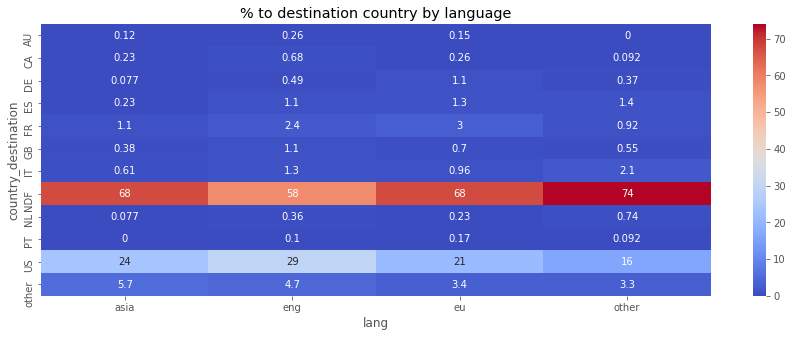

In [28]:
plt.figure(figsize=(15, 5))
sns.heatmap(lang_stack.transpose(), cmap='coolwarm', annot=True)
plt.title('% to destination country by language')
plt.show()

Despite highly imbalance data, eng platform still have the highest probability of booking a destination (mostly within US). European languages platform show slightly higher booking to France. 

In [131]:
train['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In general, ~50% of the activities won't lead to a booking. US is still the most visit destination, followed by France.

In [32]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,first_active,account_created,first_book
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19 04:32:55,2010-06-28,NaT
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23 17:48:09,2011-05-25,NaT
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09 23:12:47,2010-09-28,2010-08-02
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31 06:01:29,2011-12-05,2012-09-08
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08 06:11:05,2010-09-14,2010-02-18


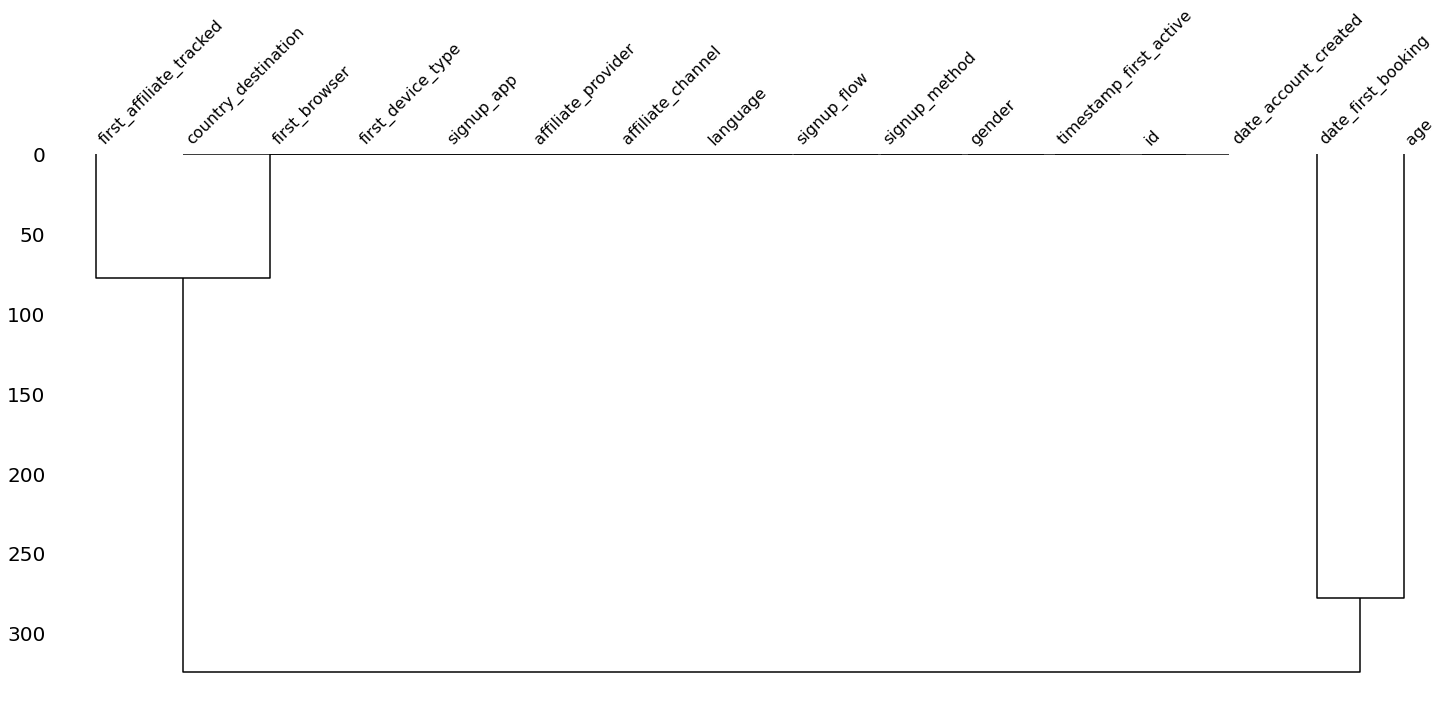

In [24]:
msno.dendrogram(train);

In [12]:
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


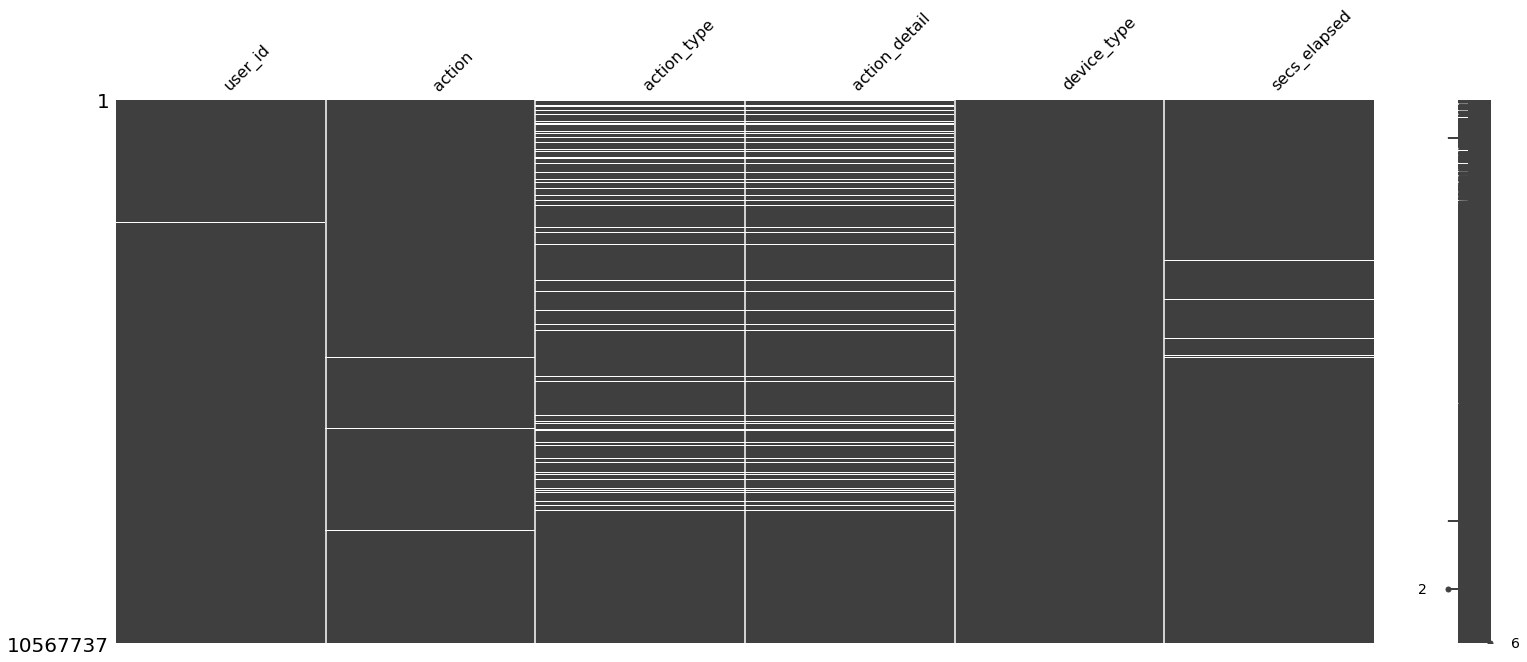

In [26]:
msno.matrix(session);